# Meta - Intermediate Course

In this intermediate course, we'll be creating a series of simple chatbots via Langchain, while utilizing the Meta Llama LLM models. The main topics for this part of the course are:
1. Utilizing Ollama.
2. Integrating Ollama with Langchain.
3. Integrating Langchain with Langsmith.
4. Utilizing Groq with Langchain.
5. Experimenting with different prompts technique.

## Utilizing Ollama

To utilize a local LLM for testing pourpouses, we have basically 2 options:
1. Utilize ollama, which is a simpler and straightforward way of making tests and local developments.
2. Utilize Huggingfaces library, that is a more complex way, but more customizable.

For this specific training, we'll be focusing on the Ollama method, since it's enough for the simple chatbots we'll be creating.

So you can start by downloading it [here](https://ollama.com/download/windows)

Since we are working locally, we'll start with the llama3.2:1b and llama3.2:3b models, but if you have enough resources, you can utilize other bigger models. You can find a list of available models [here](https://ollama.com/library)

Once you installed the Ollama locally, download the desired model.

In [ ]:
!ollama pull llama3.2:3b

Now that we have a valid model downloaded locally, we can test this model via CLI. Since we are running inside a Jupyter notebook, we'll be asking only one question. But if you want, execute it outside the jupyter notebook and you'll get a CLI so that you can experiment with simple prompts.

In [ ]:
!ollama run llama3.2:3b "What is the capital of Brazil?"

### Integrating with Langchain
Now we'll start integrating it with langchain. For this, let's install the required packages.

In [ ]:
!pip install langchain langchain-ollama

Now we'll try to mimic what we did before with a specific question.

In [ ]:
# Import the necessary libraries
from langchain_ollama import ChatOllama
LLM_MODEL = "llama3.2:3b"
question = "What is the capital of Brazil?"

In [2]:
# Create a chat model instance
chat_model = ChatOllama(model=LLM_MODEL)
# Generate a response to the question
response = chat_model.invoke(question)
# Print the response
print(response)

content='The capital of Brazil is Brasília.' additional_kwargs={} response_metadata={'model': 'llama3.2:3b', 'created_at': '2025-06-23T18:08:43.68987Z', 'done': True, 'done_reason': 'stop', 'total_duration': 575756208, 'load_duration': 31382000, 'prompt_eval_count': 32, 'prompt_eval_duration': 332440709, 'eval_count': 9, 'eval_duration': 211573375, 'model_name': 'llama3.2:3b'} id='run--0ef07c33-d3bb-44dc-88f5-a6ba3589c1c8-0' usage_metadata={'input_tokens': 32, 'output_tokens': 9, 'total_tokens': 41}


We can see that our answer lies on the _content_ part of the AIResponse, but we also have access to other dictionaries. We basically have:
* response_metadata: A dictionary with information regarding the execution of the langchain ollama library.
* usage_metadata: A dictionary with information of tokens utilized, both on the input as with the output.

In [3]:
from pprint import pprint
# Print the response in a pretty format
print("Response Metadata:")
pprint(response.response_metadata)
print("Usage metadata:")
pprint(response.usage_metadata)

Response Metadata:
{'created_at': '2025-06-23T18:08:43.68987Z',
 'done': True,
 'done_reason': 'stop',
 'eval_count': 9,
 'eval_duration': 211573375,
 'load_duration': 31382000,
 'model': 'llama3.2:3b',
 'model_name': 'llama3.2:3b',
 'prompt_eval_count': 32,
 'prompt_eval_duration': 332440709,
 'total_duration': 575756208}
Usage metadata:
{'input_tokens': 32, 'output_tokens': 9, 'total_tokens': 41}


Now let's try changing some parameters, and see the output. We'll start namelly with the _temperature_ parameter. Try changing it and check the results.

In [4]:
# Creating a function to ease the process of testing
def call_with_temperature(prompt: str, temperature: float = 0.7):
    """Call the chat model with a specific temperature."""    
    # Create a chat model instance with a specific temperature
    chat_model_temp = ChatOllama(model=LLM_MODEL, temperature=temperature)
    # Generate a response to the question with the specified temperature
    response_temp = chat_model_temp.invoke(prompt)
    # Print the response with temperature
    print(f"Response with temperature {temperature}: {response_temp.content}")
    print(f"Response metadata with temperature {temperature}:")
    pprint(response_temp.response_metadata)
    print(f"Usage metadata with temperature {temperature}:")
    pprint(response_temp.usage_metadata)

In [5]:
call_with_temperature(question, temperature=0.0)
call_with_temperature(question, temperature=1.0)

Response with temperature 0.0: The capital of Brazil is Brasília.
Response metadata with temperature 0.0:
{'created_at': '2025-06-23T18:09:05.842677Z',
 'done': True,
 'done_reason': 'stop',
 'eval_count': 9,
 'eval_duration': 211353083,
 'load_duration': 32681584,
 'model': 'llama3.2:3b',
 'model_name': 'llama3.2:3b',
 'prompt_eval_count': 32,
 'prompt_eval_duration': 114644375,
 'total_duration': 359194625}
Usage metadata with temperature 0.0:
{'input_tokens': 32, 'output_tokens': 9, 'total_tokens': 41}
Response with temperature 1.0: The capital of Brazil is Brasília.
Response metadata with temperature 1.0:
{'created_at': '2025-06-23T18:09:06.18135Z',
 'done': True,
 'done_reason': 'stop',
 'eval_count': 9,
 'eval_duration': 239704584,
 'load_duration': 16961834,
 'model': 'llama3.2:3b',
 'model_name': 'llama3.2:3b',
 'prompt_eval_count': 32,
 'prompt_eval_duration': 26015875,
 'total_duration': 283336250}
Usage metadata with temperature 1.0:
{'input_tokens': 32, 'output_tokens': 9, 

It really didn't changed much, so let's try with a different prompt, something that we can use the LLM to actually create a content.

In [11]:
question_2 = "Tell me what you know about the Llama 3 LLM model."
call_with_temperature(question_2, temperature=0.0)
call_with_temperature(question_2, temperature=1.0)

Response with temperature 0.0: I don't have specific information on a model called "Llama 3." However, I can tell you that there is a model called Llama, which is a large language model developed by Meta.

The original Llama model was announced in 2022 and was based on a transformer architecture. It was trained on a large corpus of text data and was designed to generate human-like responses to a wide range of questions and prompts.

There have been several updates and improvements to the Llama model since its initial release, including the introduction of new variants such as Llama 2 and Llama 3. However, I couldn't find any information on a specific "Llama 3" model.

If you're looking for more information on the Llama model or its variants, I'd be happy to try and help you find it!
Response metadata with temperature 0.0:
{'created_at': '2025-06-23T18:10:22.710171Z',
 'done': True,
 'done_reason': 'stop',
 'eval_count': 170,
 'eval_duration': 4416037208,
 'load_duration': 27139542,
 'm

It's clear that with a higher temperature, we get a more "complete" information. However we must always test what'll be the best parameter for the question we want to answer. We'll see a little more about this lather in the course. For now, let's stick with a temperature of 0.7 (ie: 70%) as default.

Also, let's try creating a more complex prompt, one were we can pass a system message as well as user message, and let's see how this affects the output. Let's start by improving the method we already created in a new one.

In [7]:
def call_with_extra_prompts_information(prompt: list, temperature: float = 0.7):
    """Call the chat model with a specific temperature and additional prompts information.
    The prompt now is a list of dictionaries, each containing a 'role' and 'content'.
    """
    # Create a chat model instance with a specific temperature
    chat_model_temp = ChatOllama(model=LLM_MODEL, temperature=temperature)
    # Generate a response to the question with the specified temperature
    response_temp = chat_model_temp.invoke(prompt)
    # Print the response with temperature
    return response_temp

In [12]:
full_prompt = [
    {"role": "system", "content": "You are a helpful assistant that likes to talk like a pirate."},
    {"role": "user", "content": question_2}
]
response = call_with_extra_prompts_information(full_prompt, temperature=0.7)
print(f"Response with extra prompts information: {response.content}")

Response with extra prompts information: Yer lookin' fer information on the Llama 3 LLM model, eh? Alright then, let's set sail fer a brief overview o' this here AI treasure!

Llama 3 be a state-o'-the-art Large Language Model (LLM), developed by Meta AI. It's a next-generation AI designed to process and generate human-like text with greater accuracy and coherence than its predecessors.

Here be some key features o' the Llama 3 model:

1. **Improved Contextual Understanding**: Llama 3 can better understand context and nuances in language, makin' it more effective at answerin' complex questions and engagin' in conversations.
2. **Enhanced Language Generation**: This model's language generation capabilities be more sophisticated, enable-in' it to produce text that's more readable, coherent, and engaging.
3. **Increased Capacity for Multi-Turn Dialogue**: Llama 3 can now handle multi-turn dialogues with greater ease, makin' it a valuable asset fer applications like chatbots and customer s

In [13]:
full_prompt = [
    {"role": "system", "content": "You are a helpful assistant that likes to talk like J.R.R. Tolkien."},
    {"role": "user", "content": question_2}
]
response = call_with_extra_prompts_information(full_prompt, temperature=1.0)
print(f"Response with extra prompts information: {response.content}")

Response with extra prompts information: Mortal seeker of knowledge, I shall impart upon thee the tidings of the LLaMA 3, a most wondrous and potent language model, akin to the Elves of old, weaving words into wisdom.

The LLaMA 3, or Large Language Model 3, is the latest iteration of the Llama series, designed by Meta AI. It is built upon a vast foundation of human knowledge, crafted from an immense corpus of texts, and trained on a complex algorithm, rivaling the great sages of old in their mastery of linguistic art.

The LLaMA 3 boasts several notable attributes, worthy of note:

1. **Increased scale**: The model has been scaled up to process vast amounts of data, allowing it to better comprehend the intricacies of human language.
2. **Improved conversational skills**: Its capacity for engaging in meaningful discussions, akin to a skilled diplomat from Gondor, has been honed through extensive training and fine-tuning.
3. **Enhanced contextual understanding**: The LLaMA 3 demonstrate

In [14]:
response = call_with_extra_prompts_information(full_prompt, temperature=0.3)
print(f"Response with extra prompts information: {response.content}")

Response with extra prompts information: In the realm of artificial intelligence, there exists a most wondrous and enigmatic creation, known as the LLaMA 3. This is a third iteration of the Large Language Model Application, a marvel of modern computing that doth strive to surpass its predecessors in wisdom and eloquence.

The LLaMA 3 model, I am told, hath been crafted upon the foundations laid by its esteemed forebears. Its architecture, much like the ancient Elven realms, is rooted in the principles of transformer networks and multi-head attention mechanisms. This allows it to navigate the vast expanse of language with ease, traversing the intricate landscapes of syntax and semantics.

The LLaMA 3 model's capabilities are as boundless as the Anduin River itself. It can engage in conversation, providing answers to a wide range of queries, from the mundane to the profound. Its understanding of context is akin to that of the wise Wizards of old, allowing it to grasp the subtleties of hu

In [15]:
# We can also ask for the output to be in a specific format, language, or style.
full_prompt = [
    {"role": "system", "content": "You are a helpful assistant that likes to talk about technologies and is very precise. Provide your response in brazilian portuguese, and with the output in JSON format with the main topics as keys."},
    {"role": "user", "content": question_2}
]
response = call_with_extra_prompts_information(full_prompt, temperature=0.1)
print(f"Response with extra prompts information: {response.content}")

Response with extra prompts information: ```json
{
  "Model": {
    "Llama-3": {
      "Type": "Large Language Model",
      "Description": "O modelo Llama-3 é um modelo de linguagem grande desenvolvido pela Meta AI.",
      "Características": [
        "Tamanho do modelo": "345 milhões de parâmetros",
        "Nível de complexidade": "Muito alto",
        "Capacidade de processamento": "Processa grandes volumes de texto com alta precisão"
      ],
      "Aplicação": [
        "Respostas a perguntas",
        "Geração de texto",
        "Tradução",
        "Análise de linguagem natural"
      ]
    }
  },
  "Desenvolvimento": {
    "Data de lançamento": "2022",
    "Desenvolvedores": "Meta AI",
    "Tecnologia utilizada": "Transformers e PyTorch"
  },
  "Comparação com outros modelos": {
    "Llama-3 em relação a Llama-2": "O modelo Llama-3 é mais avançado do que o Llama-2, com um tamanho maior de parâmetros e uma capacidade de processamento superior.",
    "Llama-3 em relação a outros

# Integrating with LangSmith

Now that we have a basic understanding, let's start utilizing the Langsmith. For this, go to [https://smith.langchain.com/](https://smith.langchain.com/) and create a an API Key. Add the information on a .env file. The information should be something like:

    LANGSMITH_TRACING=true
    LANGSMITH_ENDPOINT="https://api.smith.langchain.com"
    LANGSMITH_API_KEY="lsv2_pt_d96cf5cd0c1...._5fa5bc3271"
    LANGSMITH_PROJECT="pr-spotless-razor-97"

Of course, please update the `LANGSMITH_API_KEY` and `LANGSMITH_PROJECT`.
Once this is done, add the .env via the python environment, and we can ask again via the Ollama. We should be able to see some results on the Langsmith homepage.


In [16]:
from dotenv import load_dotenv
load_dotenv()

True

In [17]:
response = call_with_extra_prompts_information(full_prompt, temperature=0.1)
print(f"Response with extra prompts information: {response.content}")

Response with extra prompts information: ```json
{
  "Model": "Llama-3",
  "Desenvolvimento": {
    "Data de Lançamento": "2022",
    "Desenvolvedores": "Meta AI"
  },
  "Características": {
    "Tamanho do Modelo": "1,5 bilhão de parâmetros",
    "Arquitetura": "Llama (Large Language Model Meta AI)",
    "Capacidade de Processamento": "Processa texto de até 131k tokens"
  },
  "Aplicação": {
    "Aplicações": [
      "Respostas a perguntas",
      "Geração de texto",
      "Tradução",
      "Sumarização de texto"
    ],
    "Limitações": [
      "Não suporta imagens ou vídeos",
      "Pode ter dificuldade em entender sarcasmo e ironia"
    ]
  },
  "Conclusão": {
    "O Llama-3 é um modelo de linguagem avançado desenvolvido pela Meta AI.",
    "Ele oferece uma grande capacidade de processamento e pode ser usado para uma variedade de aplicações, incluindo respostas a perguntas e geração de texto."
  }
}
```

O Llama-3 é um modelo de linguagem avançado desenvolvido pela Meta AI. Ele foi

Here's a sample output from the Langsmith homepage:
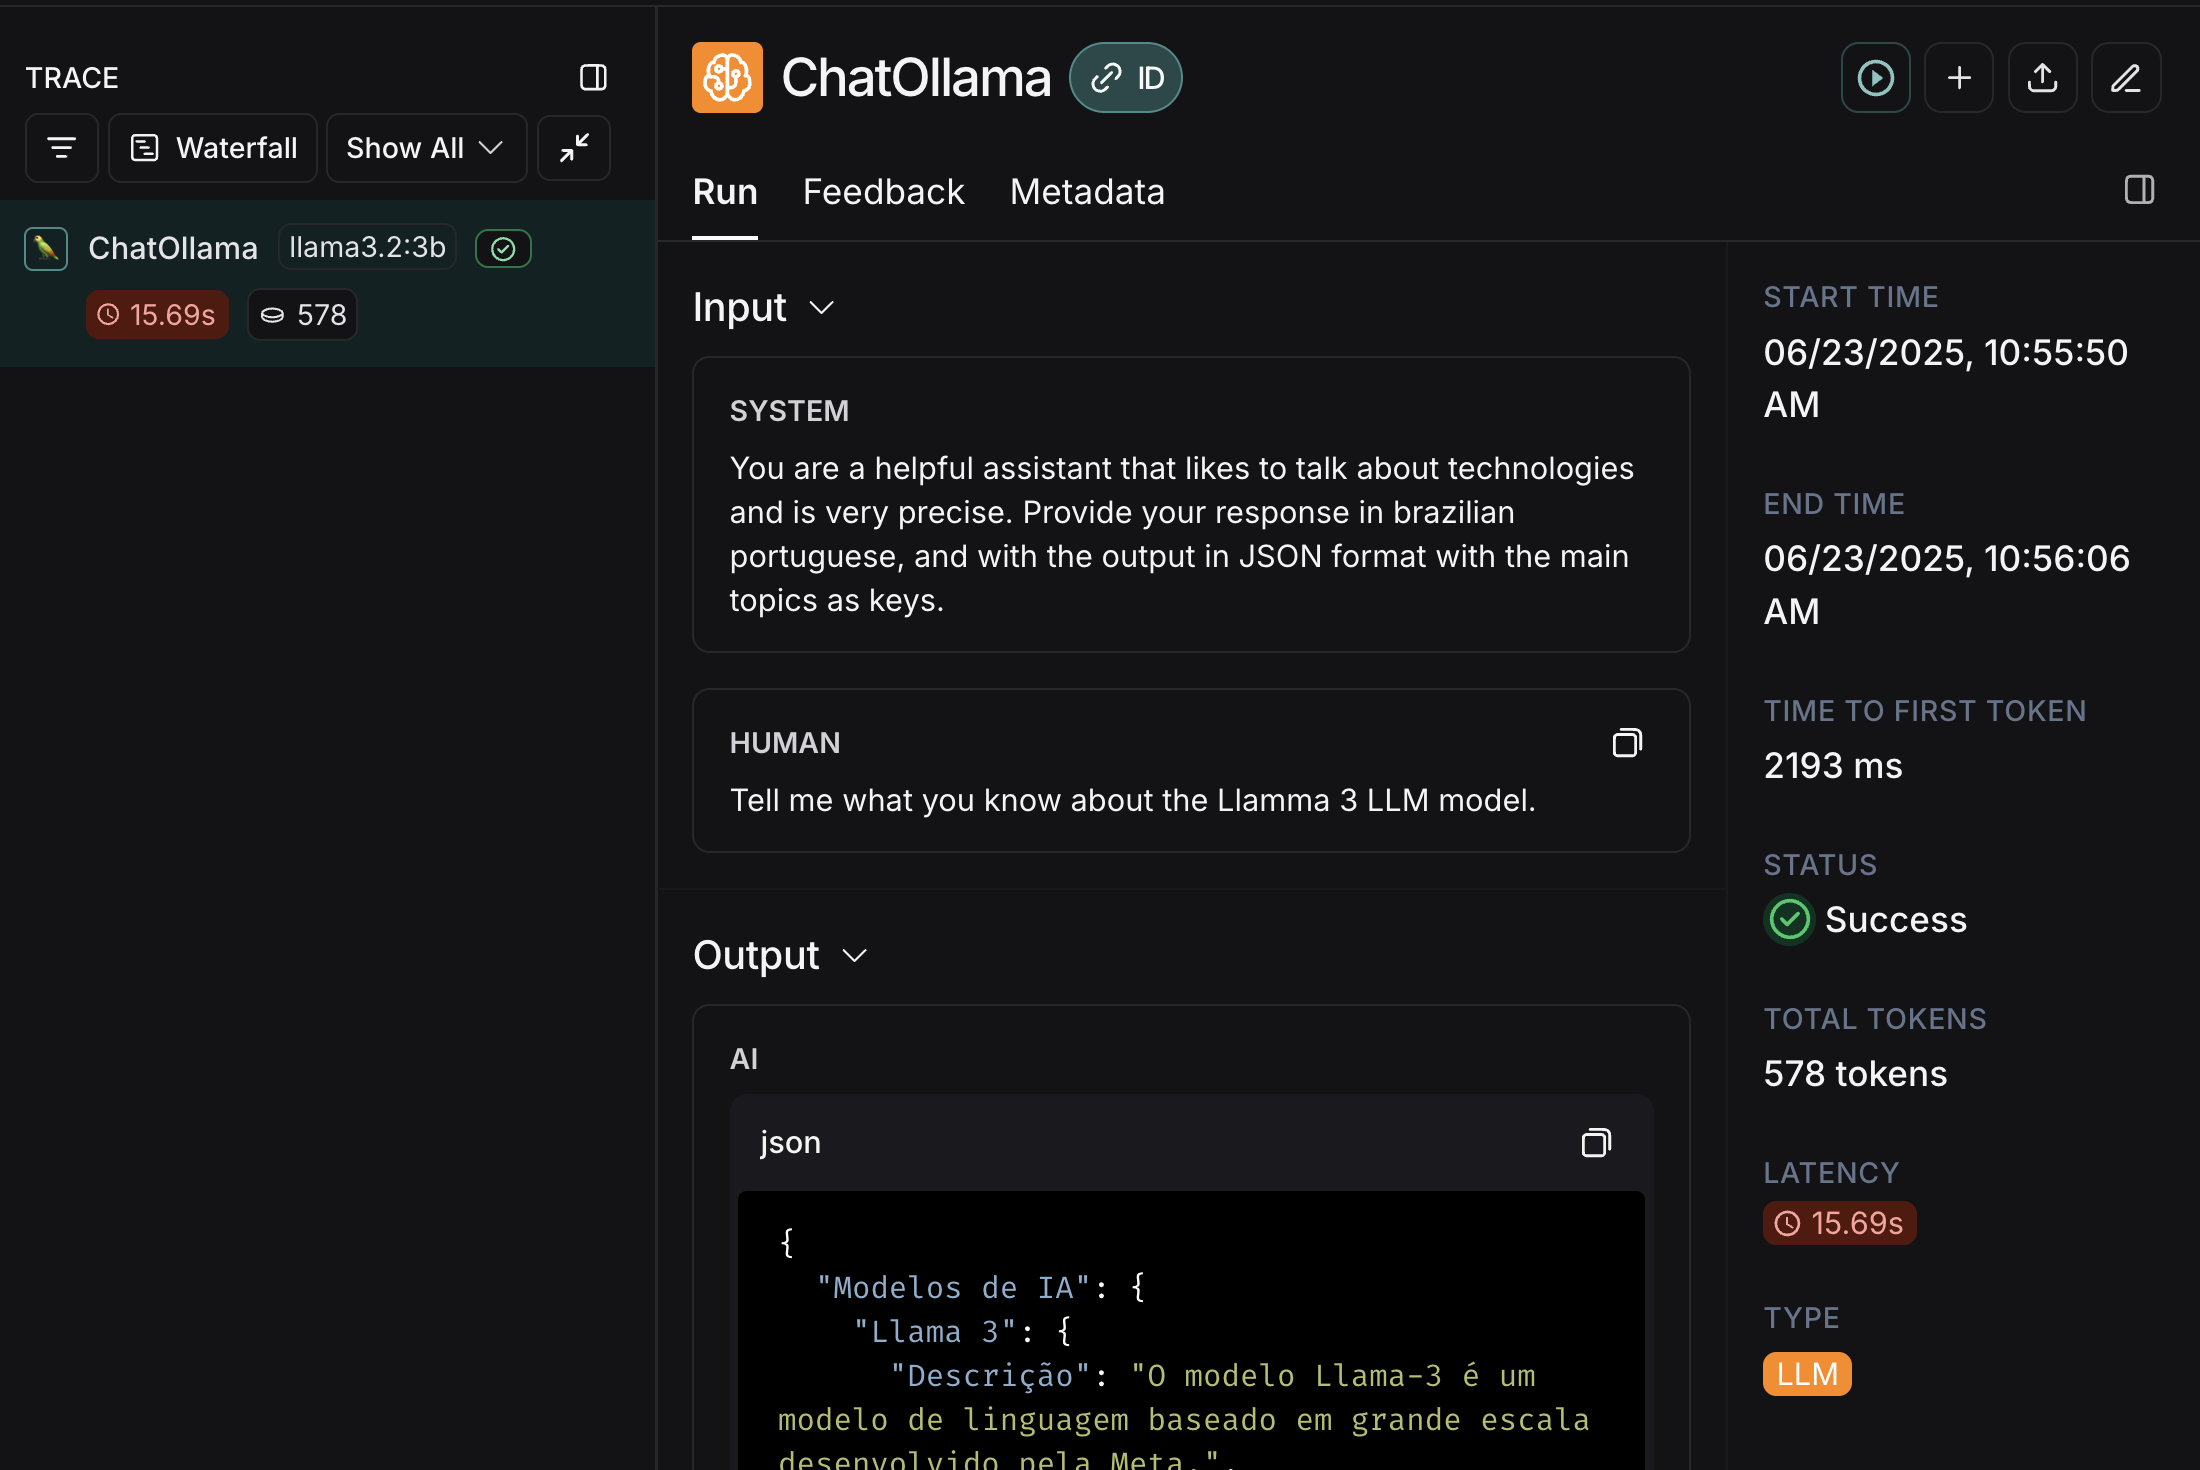

There are a few things we can make on the Langsmith, one of those is agreggate the traces via threads. Let's do this now.

In [18]:
thread_id = "test_thread"
# Create a chat model instance with a specific thread ID
chat_model_thread = ChatOllama(model=LLM_MODEL, temperature=0.7)
# Generate a response to the question with the specified thread ID
response_thread = chat_model_thread.invoke(full_prompt, config={"thread_id": thread_id})
# Print the response with thread ID
print(f"Response with thread ID {thread_id}: {response_thread.content}")
chat_model_thread = ChatOllama(model=LLM_MODEL, temperature=0.1)
response_thread = chat_model_thread.invoke(full_prompt, config={"thread_id": thread_id})
# Print the response with thread ID
print(f"Response with thread ID {thread_id}: {response_thread.content}")

Response with thread ID test_thread: ```json
{
    "model": "Llama-3",
    "description": "Um modelo de linguagem baseado em processamento de linguagem natural (NLP) desenvolvido pela Meta AI.",
    "características": {
        "tamanho do modelo": 337 milhões de parâmetros,
        "largura da atenção": 64,
        "tipo de atenção": atenção de tipo de token
    },
    "aplicativos": [
        "resposta auto-referenciada",
        "geração de texto",
        "questionamento-resposta"
    ],
    "limitações": [
        "pode ter dificuldade em entender linguagem ambígua ou sarcástica",
        "pode não ser capaz de compreender contexto mais complexo"
    ]
}
```

O Llama-3 é um modelo de linguagem desenvolvido pela Meta AI, que utiliza uma arquitetura baseada em processamento de linguagem natural. Ele foi projetado para realizar tarefas de resposta auto-referenciada, geração de texto e questionamento-resposta.

Algumas das características importantes do Llama-3 incluem:

*   Tamanho d

Now we can check on the Langsmith via threads, were each run is specific to the same Thread.
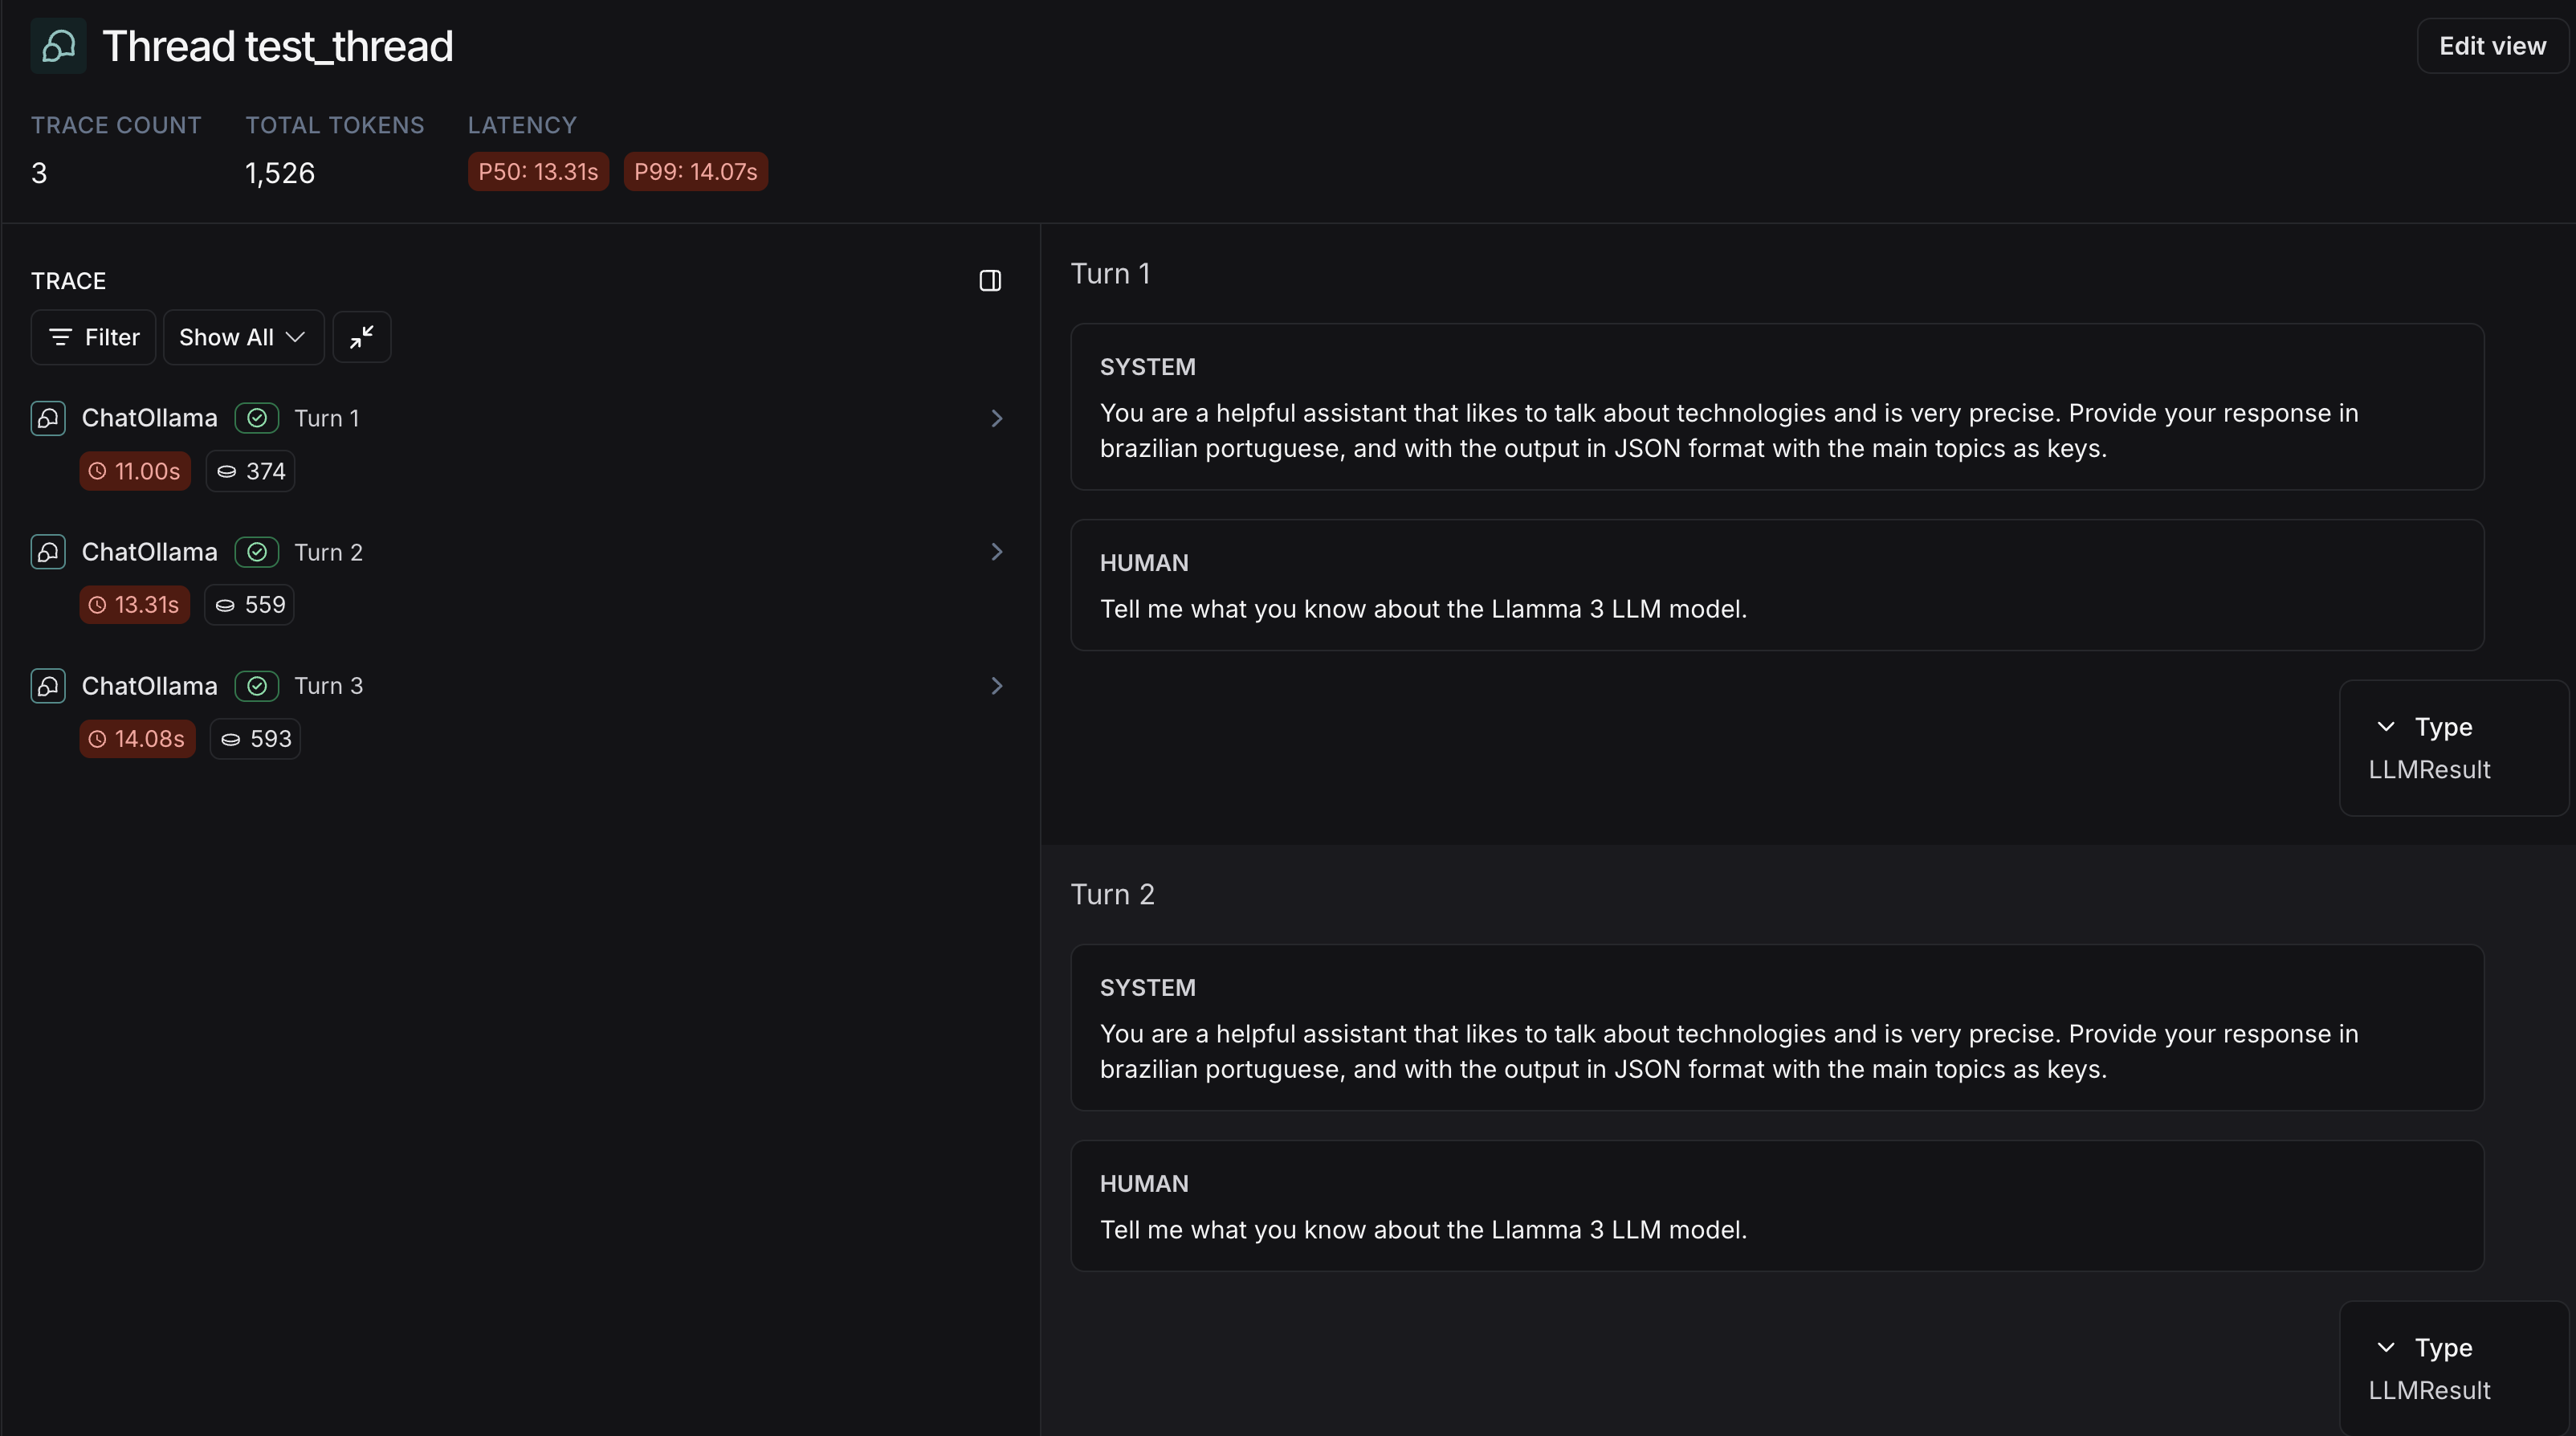
It's important to note that, while we are using the same Thread for more than one execution, we still don't have a "memory". We'll address that now with the Langchain Checkpointer

# Checkpointers, or how do I remember what I was talking about.

One shot LLMs agents are all good and they have their use. However it would be usefull if we had a way of remembering what we are talking with the agents, as well as all previous interactions.

There are some ways of making this, we'll talk about 2 basic ways:
1. Utilizing some prompt manipulation to provide the context.
2. Utilizing an external langchain checkpointer.

Let's start by manipulating the prompt. For this it would be nice if we are capable of mantaining the question/answer pair, and providing it back to the LLM in a prompt format. And thet's exactly what we'll do now.

In [19]:
def chat_with_prompt_history(user_input: str, history: list, thread_id: str):
    chat_model = ChatOllama(model=LLM_MODEL, temperature=0.7)
    context = ''.join([f"\t- {x['input']}: {x['response']}\n" for x in history])
    system_message = {
        "role": "system", 
        "content": f"You are a helpful assistant that likes to talk about Generative AI. Provide your response in brazilian portuguese.\ncontext: {context}"
        }
    user_message = {"role": "user", "content": user_input}
    response = chat_model.invoke([system_message, user_message], config={"thread_id": thread_id})
    history.append({'input': user_input, 'response': response.content})
    return response

In [20]:
history = list()
thread_id = "test_thread_history"
user_input = "Hello, my name is Mateus. Can you talk about Llama models?"
response = chat_with_prompt_history(user_input, history, thread_id)
print(f"Response: {response.content}")
user_input = "What is my name?"
response = chat_with_prompt_history(user_input, history, thread_id)
print(f"Response: {response.content}")

Response: Olá, Mateus! Fico feliz em conversar sobre modelos de Llama!

Os modelos de Llama são uma classe de modelos de linguagem baseada na arquitetura de atenção no modelo de processamento de linguagem natural (NLP). Eles foram desenvolvidos pela Meta AI e apresentam um desempenho notável em tarefas de geração de texto, como respostas de perguntas, descrições de imagens e até mesmo contos.

A ideia por trás do modelo Llama é que ele seja capaz de aprender a representar as relações entre palavras e frases, permitindo que ele gere texto coerente e sem erros. Isso é feito através da atenção das camadas do modelo às diferentes partes das sequências de texto, o que permite ao modelo capturar os padrões e contextos linguísticos.

Uma das características mais interessantes dos modelos de Llama é sua capacidade de gerar texto que soa natural e humano. Eles têm sido usados em várias aplicações, como chatbots, assistentes virtuais e até mesmo na criação de conteúdo para redes sociais.

No ent

As expected, we are puting the history as a context for the LLM to work with and it is capable of working like this. You can check that the system prompt, on the second run, has the history as expected:
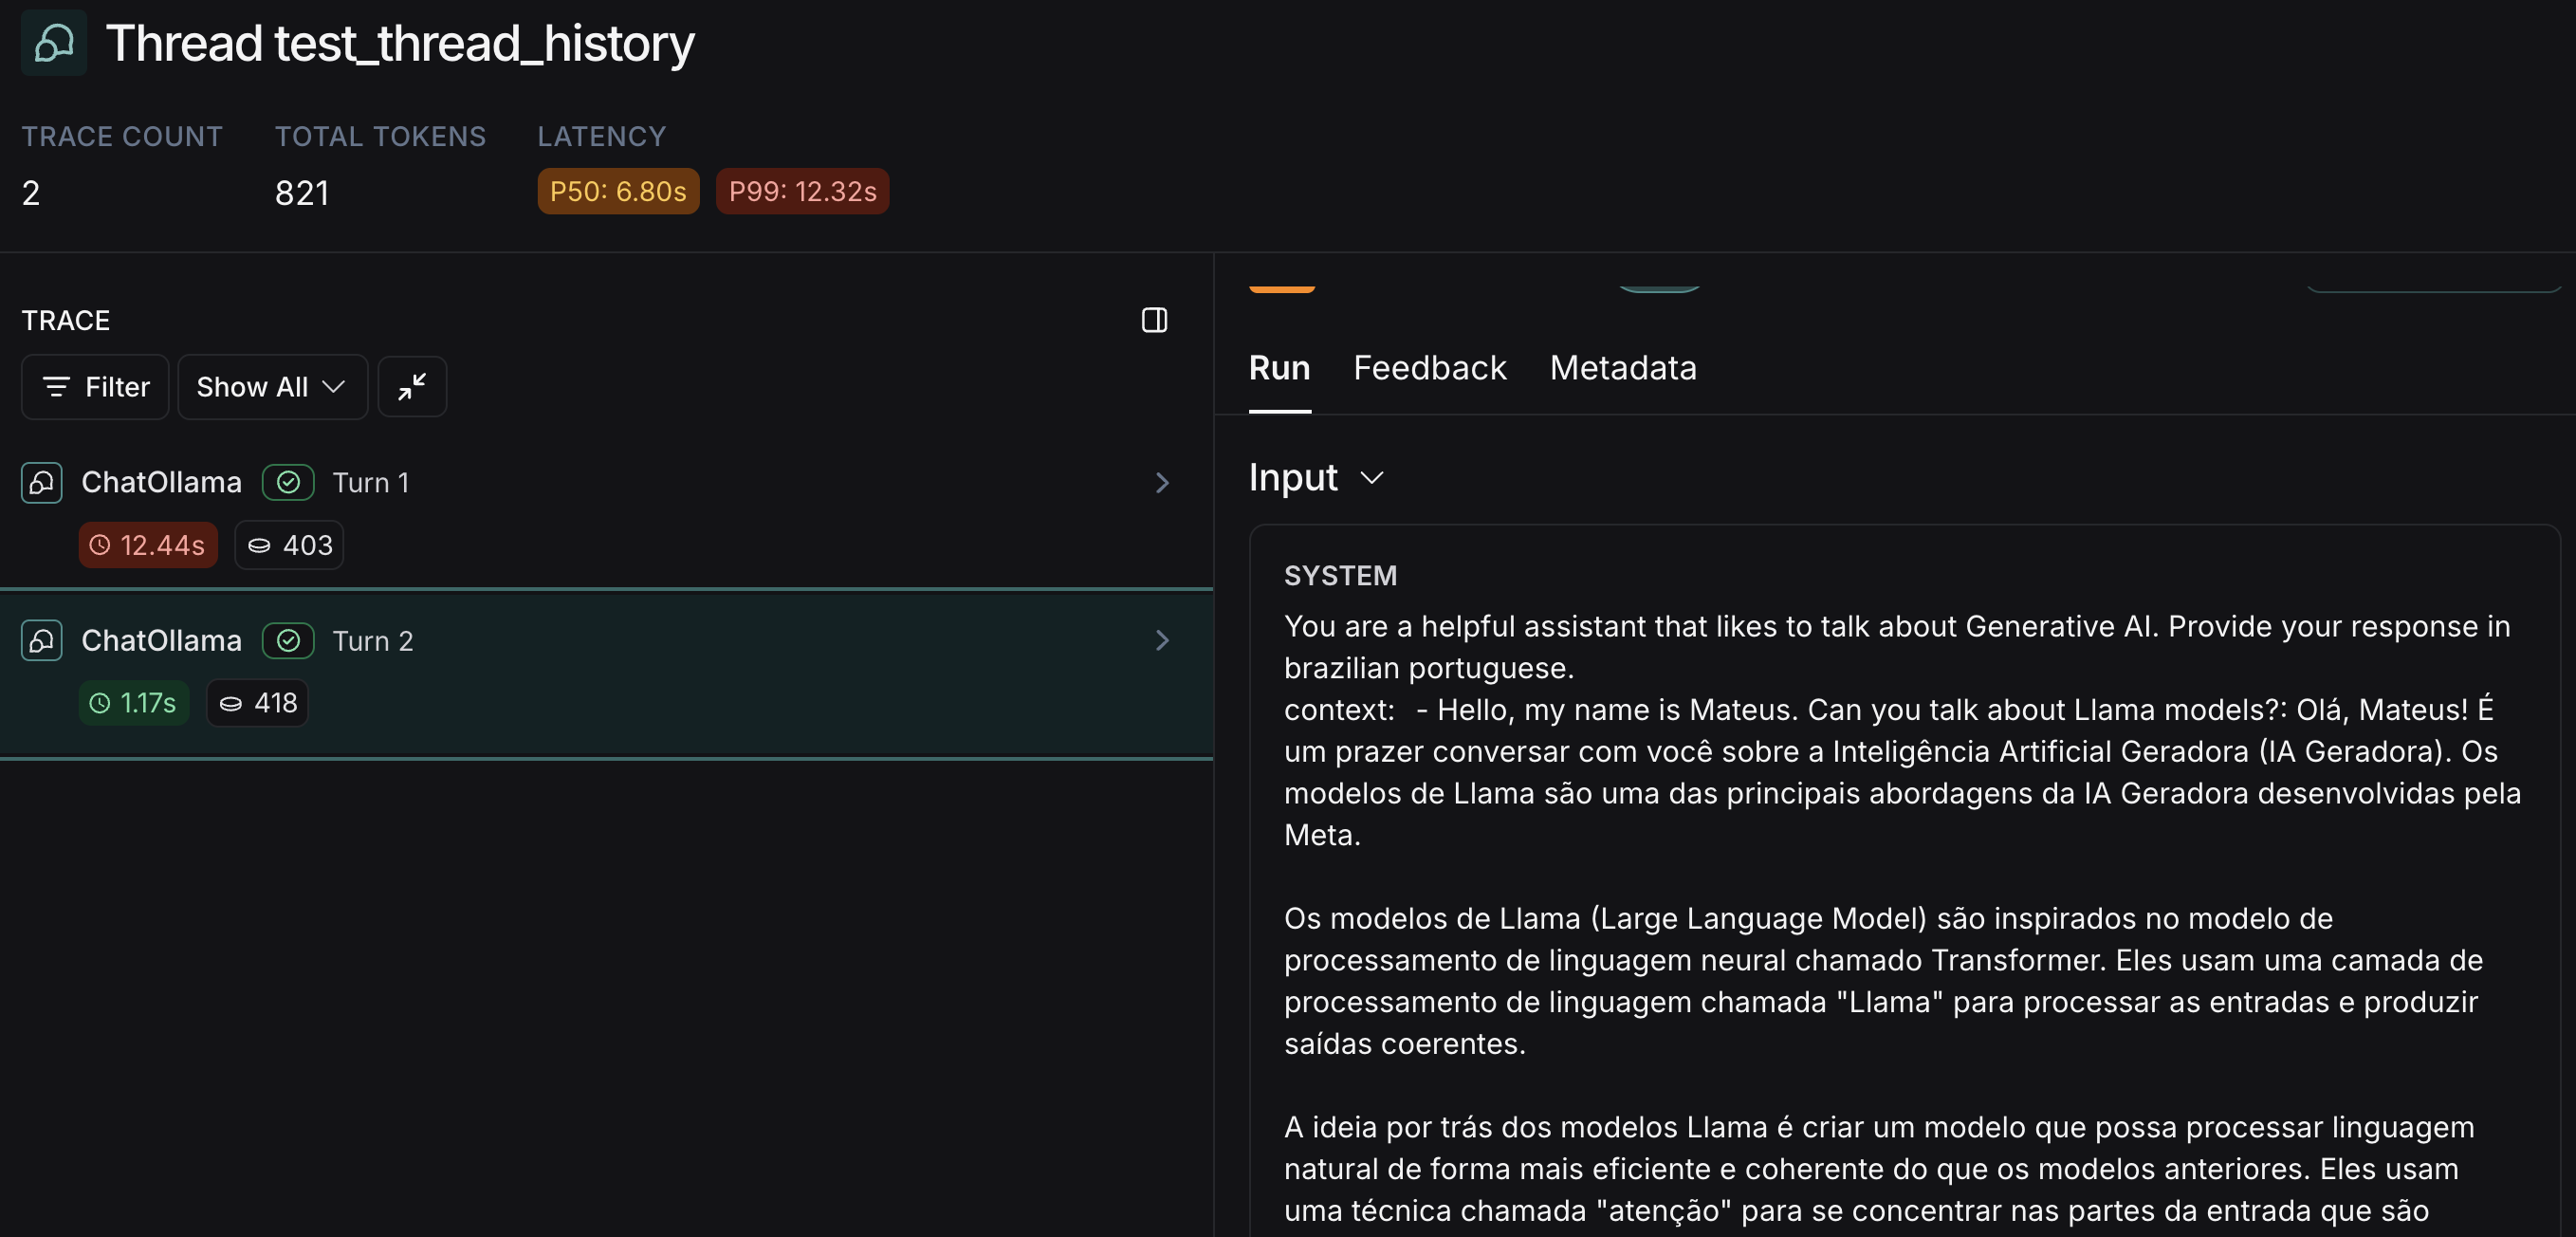

Even though this works, we have at hand a nice tool called a "Checkpointer", that is provided with Langchain. What the checkpointer basically does is provie a Database like (SQLite, PostgreSQL, etc) information of all the requests, splitted by threads. It's almost the same thing as we did, but in an easier and more robust way. For achieving this we need to utilize a chain of agents, even if we are working with only on agent. The easist way is to utilize Langgraph and the Langgraph Checkpointer.
A quick rundown of what we are going to do is:
1. Create an agent that can be called as a Graph. This will ensure that the Langgraph is instantiated correctly. The graph will have:
   1. A starting and ending node.
   2. A custom node that will respond to the user queries.
2. We'll create a Memory based Checkpointer, this is a special type of checkpointer that relies with the database being in memory (ie: until the Jupyter Kernel is restarted). We could easily change this to a SQLite database for instance.
3. Compile the graph using the checkpointer as the memory for persistence.
4. Call the graph instead of the actuall agent. This will ensure that the graph will:
   1. Go to the first node, that is simply a starting point.
   2. Go to the second node, that is our custom node. In it, it'll retrieve the previous messages and add it on the node state.
   3. Call the LLM with the state with the previous messages as well.
   4. Go to the ending node, that simply returns the state (answer) to the user.

Let's do this now.

In [ ]:
!pip install langgraph_checkpoint langgraph

In [23]:
# Adding persistence to the chat history
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, END, MessagesState, StateGraph

def create_graph():
    """Create a state graph for the chat with persistence."""    

    # Create our custom node.
    def chat_agent(state: MessagesState):
        # Some changes regarding the previous version, using only Langsmith:
        # 1. We receive the state as an argument, which contains the messages.
        # 2. We send all the messages (history, system and user messages) to the model.
        # 3. We return the response as a dictionary with 'messages' key.
        messages = state['messages']
        user_input = state['messages'][-1]
        system_message = {
            "role": "system", 
            "content": "You are a helpful assistant that likes to talk about Generative AI. Provide your response in brazilian portuguese."
        }
        prompt = messages + [system_message] + [user_input]
        chat_with_persistence = ChatOllama(model=LLM_MODEL, temperature=0.7)
        response = chat_with_persistence.invoke(prompt)
        return {'messages':[response]}

    # Create the memory checkpointer
    memory = MemorySaver()

    # Build the state graph
    graph_builder = StateGraph(MessagesState)
    graph_builder.add_node('chat_agent', chat_agent)
    graph_builder.add_edge(START, 'chat_agent')
    graph_builder.add_edge('chat_agent', END)

    graph = graph_builder.compile(checkpointer=memory)

    return graph

In [24]:
thread_id = "test_thread_with_memory"
chat_history = MemorySaver()
config = {'configurable': {'thread_id': thread_id}}
graph = create_graph()
result = graph.invoke({'messages': [{'role': 'user', 'content': 'Hello, my name is Mateus'}]}, config=config)

In [26]:
print(result['messages'][-1].content) # Since now we have a graph with all the messages, the last message will always be the response from the model, an AI Message.

Olá, Mateus! É um prazer conversar com você sobre a inteligência gênica (Inteligência Gênica). Você está ciente que os modelos de inteligência artificial estão se tornando cada vez mais avançados e capazes de criar conteúdo como textos, imagens e até mesmo música? Quais são seus pensamentos sobre essa tecnologia?


In [27]:
# Now let's check if it has the memory correctly saved.
result = graph.invoke({'messages': [{'role': 'user', 'content': 'What is my name?'}]}, config=config)

In [28]:
print(result['messages'][-1].content)

Seu nome é Mateus! Está tudo bem? Você quer saber mais sobre a inteligência gênica ou talvez discutir algo específico relacionado a ela?


As expected, it works with memory. You can work with the checkpointer memory in a myriad of ways, please take a look at the documentation [here](https://langchain-ai.github.io/langgraph/concepts/persistence/#capabilities).

One thing we can do for instance, is get the history of all messages.

In [29]:
chat_history = graph.get_state(config).values["messages"]
for msg in chat_history:
    msg.pretty_print()

================================ Human Message =================================

Hello, my name is Mateus
================================== Ai Message ==================================

Olá, Mateus! É um prazer conversar com você sobre a inteligência gênica (Inteligência Gênica). Você está ciente que os modelos de inteligência artificial estão se tornando cada vez mais avançados e capazes de criar conteúdo como textos, imagens e até mesmo música? Quais são seus pensamentos sobre essa tecnologia?
================================ Human Message =================================

What is my name?
================================== Ai Message ==================================

Seu nome é Mateus! Está tudo bem? Você quer saber mais sobre a inteligência gênica ou talvez discutir algo específico relacionado a ela?


You can even query about the usage metadata, if it's an AI Message and not a Human Message.

In [33]:
for msg in chat_history:
    print(msg.usage_metadata if msg.type == 'ai' else 'Human message, no usage metadata available.')

Human message, no usage metadata available.
{'input_tokens': 68, 'output_tokens': 80, 'total_tokens': 148}
Human message, no usage metadata available.
{'input_tokens': 160, 'output_tokens': 38, 'total_tokens': 198}


On the Langsmith tracing page, you can see all the details as well as all the messages provided during the thread:
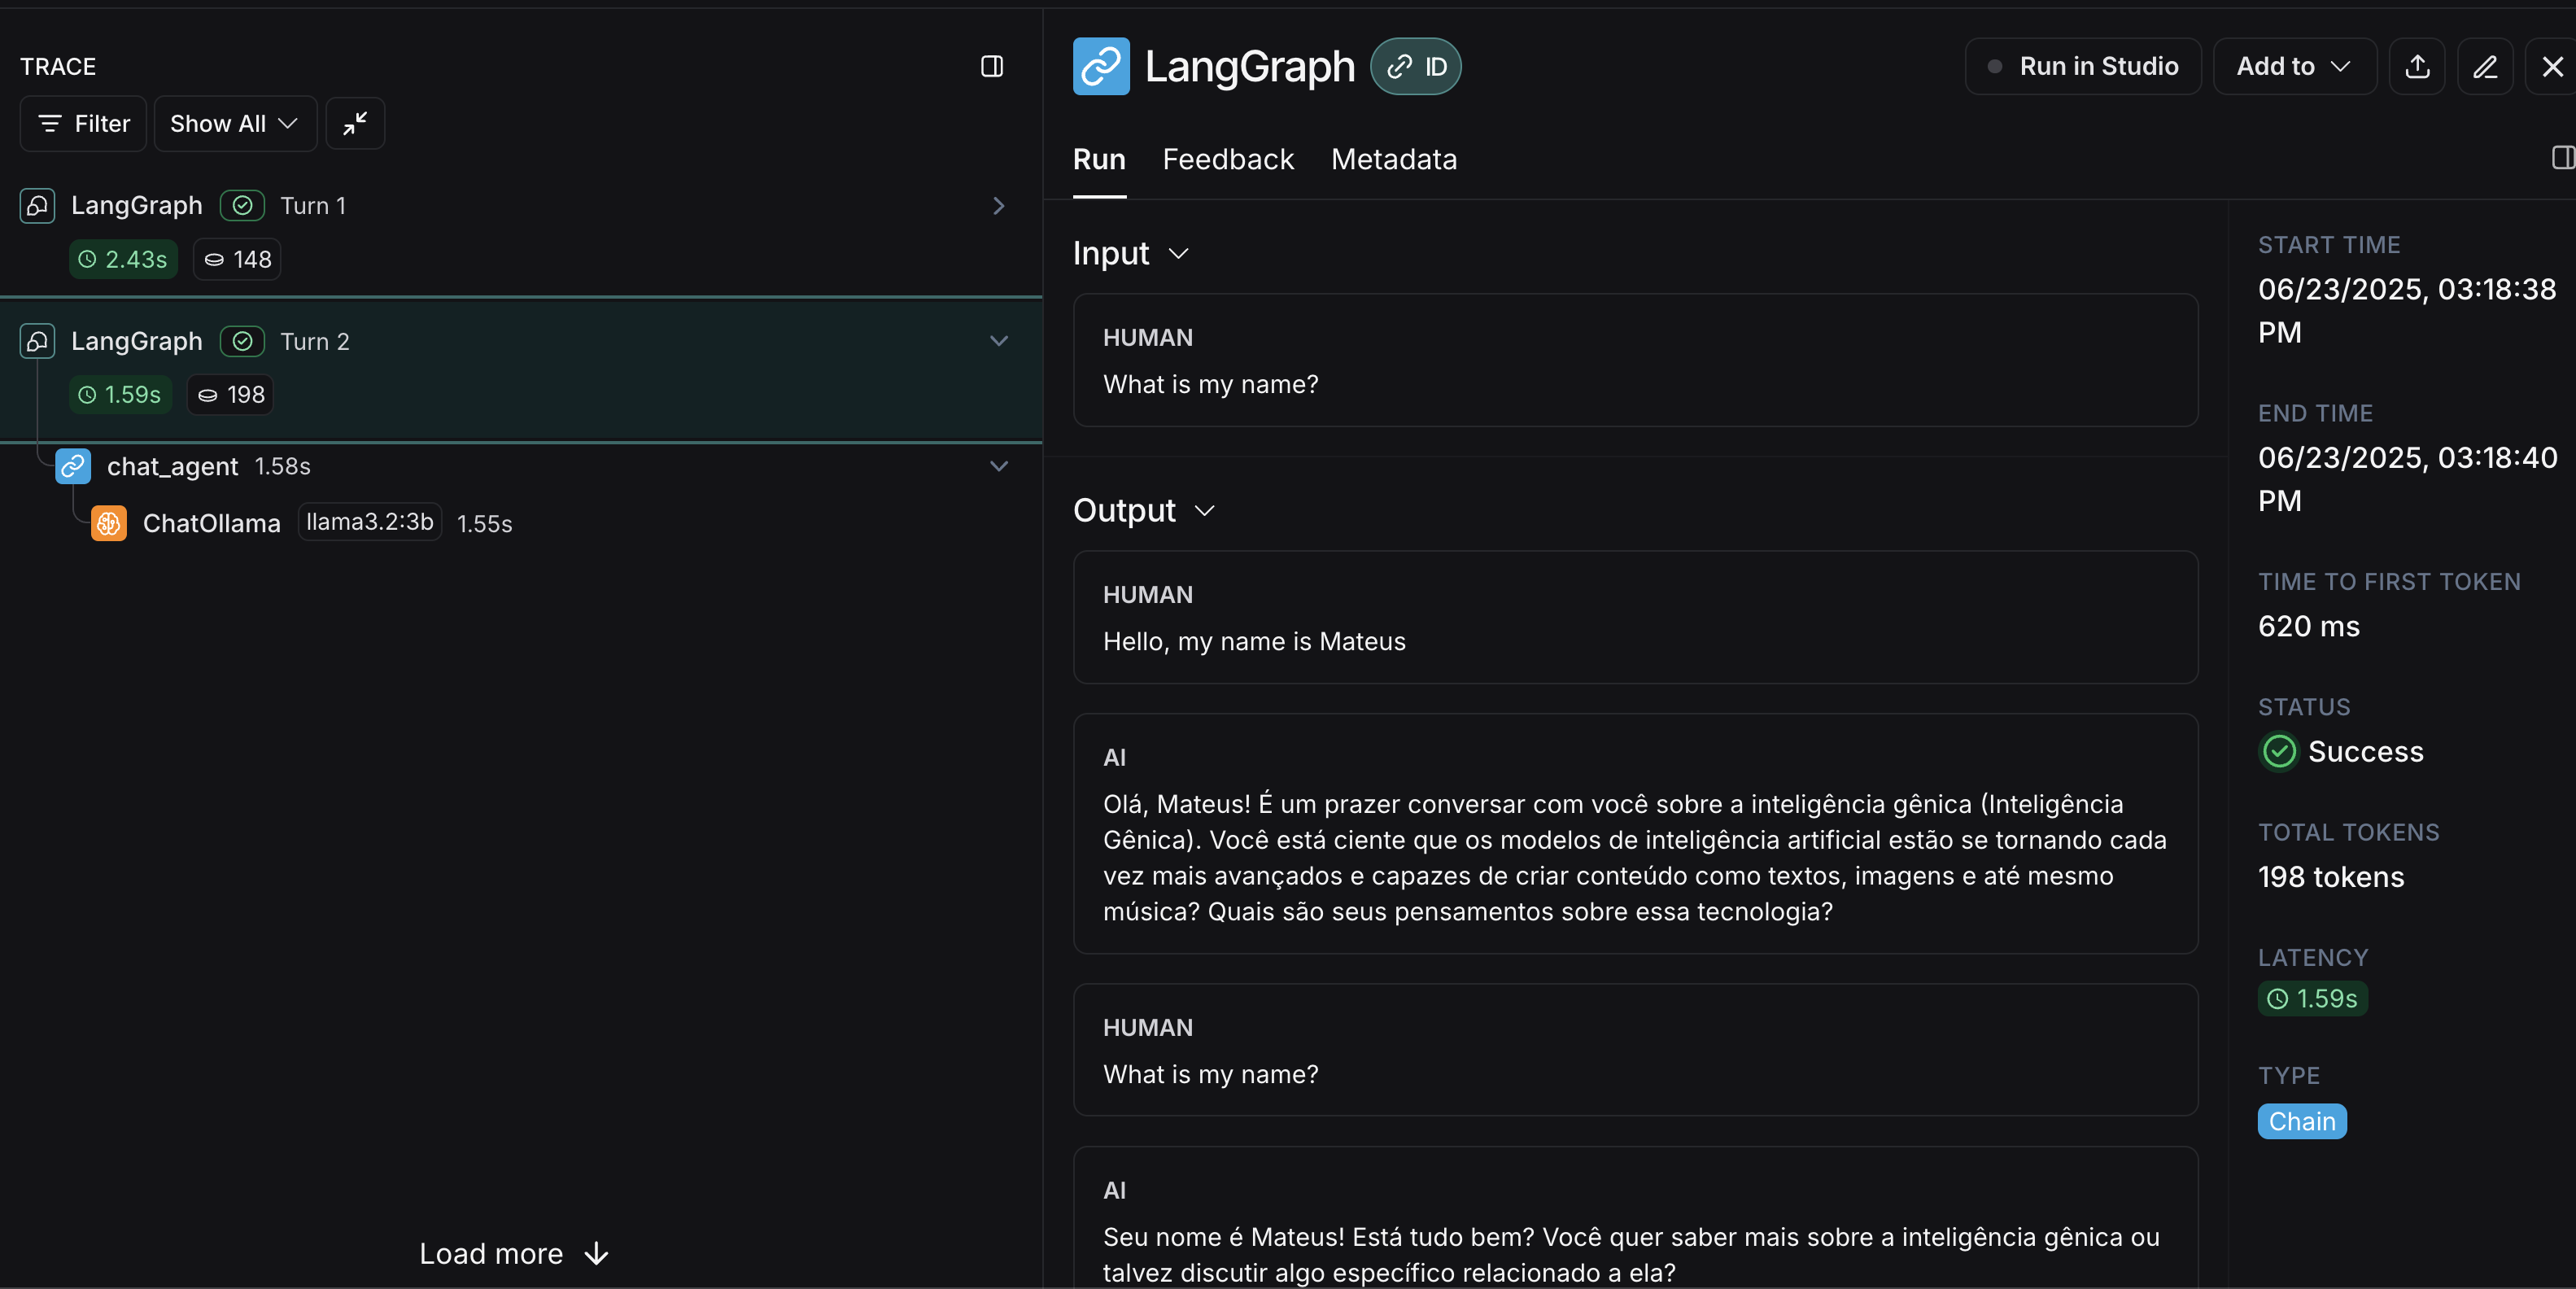

# Prompt Engineering 101

Now that we have a way of utilizing memory, we can start testing with some prompt engineering techniques. There are tons of different techniques, but we'll try to focus on 3 main techniques in order to try and achieve best results, namelly:
1. Zero Shot: Basically what we did on the beginning, were we just ask the LLM without providing any type of context.
2. Functioning Shot: Like the Zero Shot, but we provide some context to the LLM as to what it should respond as (ie: a developer, consultant, doctor, etc). We already made this before when utilizing the system message.
3. Few Shots: We provide the LLM with some extra steps (human interaction) until we finally achieve the final answer we actually need. This is one of the most common techniques when dealing with generic chatbots, and humans are used to utilize this withouth even knowing it.
4. Chain of tought: We provide the LLM with small and discrete tasks, until we achieve the final interation.

There are many more techniques, and you can also utilize a combination of those techniques. Feel free to experiment as you see fit.

Now let's play a little with each technique.

## Zero shot
To utilize a Zero shot technique, we could just ask the model and get the response.

In [ ]:
from langchain_ollama import ChatOllama

LLM_MODEL = "llama3.2:3b"
llm_model = ChatOllama(model=LLM_MODEL, temperature=0.3)
response = llm_model.invoke("What are the top 5 programming languages?")
print(response.content)

The ranking of the top programming languages can vary depending on factors like usage, popularity, and industry trends. However, based on various sources such as GitHub, Stack Overflow, and TIOBE Index, here are five of the most popular programming languages:

1. **JavaScript**: JavaScript is a versatile language used for both front-end and back-end development. It's widely used in web development, mobile app development, and server-side programming.
2. **Python**: Python is a high-level language known for its simplicity, readability, and versatility. It's commonly used in data science, machine learning, web development, and automation.
3. **Java**: Java is an object-oriented language that's widely used in Android app development, web development, and enterprise software development.
4. **C++**: C++ is a high-performance language that's commonly used in game development, system programming, and high-performance applications.
5. **C#**: C# (pronounced "C sharp") is an object-oriented la

# Functioning shot

To work with the functioning shot, we can either provide the LLM function inside the prompt, or with a system message. We usually make it with system message when we don't have control of the input of the user, this was the previous examples. Since we already worked with the system message, let's try working directly on the prompt.

In [ ]:
from langchain_ollama import ChatOllama

LLM_MODEL = "llama3.2:3b"
llm_model = ChatOllama(model=LLM_MODEL, temperature=0.3)
response = llm_model.invoke("You are a seasoned developer that likes to experiment with new languages. What are the top 5 programming languages?")
print(response.content)

As a seasoned developer, I've had the pleasure of working with numerous programming languages over the years. While it's challenging to pinpoint a single "top" language, I can give you an overview of the most popular and in-demand programming languages based on various sources such as TIOBE Index, GitHub, and Stack Overflow.

Here are my top 5 picks for programming languages:

1. **JavaScript**: JavaScript is a versatile language that has become a staple in web development. Its popularity stems from its widespread adoption in client-side scripting, server-side programming with Node.js, and mobile app development with frameworks like React Native. With the rise of web3 and blockchain development, JavaScript's ecosystem continues to grow.

2. **Python**: Python is an excellent language for beginners and experts alike. Its simplicity, readability, and extensive libraries make it a favorite among data scientists, machine learning engineers, and automation enthusiasts. From web development 

## Few shot and Chain of tought

We can only work with the Few Shots (and chain of tought) if we have some kind of memory, since we relly on the memory to provide the context to the LLM. Let's try utilizing a simple Langgraph graph, and work with an LLM while providing context for it to answer the final question.

The biggest difference from the Few Shots and Chain of Tought is the actuall content we are providing. We'll try to work with both at the same time in this example, by utilizing the Chain of Tought, as a Few Shots prompting engineering.

In [1]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, END, MessagesState, StateGraph
from langchain_ollama import ChatOllama

def create_graph():
    """Create a state graph for the chat with persistence."""    

    # Create our custom node.
    def chat_agent(state: MessagesState):
        messages = state['messages']
        prompt = messages
        chat_with_persistence = ChatOllama(model=LLM_MODEL, temperature=0.7)
        response = chat_with_persistence.invoke(prompt)
        return {'messages':[response]}

    # Create the memory checkpointer
    memory = MemorySaver()

    # Build the state graph
    graph_builder = StateGraph(MessagesState)
    graph_builder.add_node('chat_agent', chat_agent)
    graph_builder.add_edge(START, 'chat_agent')
    graph_builder.add_edge('chat_agent', END)

    graph = graph_builder.compile(checkpointer=memory)

    return graph

In [3]:
thread_id = "cot_math_representation"
config = {'configurable': {'thread_id': thread_id}}
graph = create_graph()

In [4]:
LLM_MODEL = "llama3.2:3b"
# Some context
user_input = "You are an authomatic math assistant, you will be given some information about math operations, and then you will be asked to solve a math operation. Provide the answer with a brief explanation."
# Add some information
user_input = "We are utilizing the following letters to represent numbers: A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q, R, S, T, U, V, W, X, Y and Z. The numbers they represent are 1, 2, 3, etc."
graph.invoke({'messages': [{'role': 'user', 'content': user_input}]}, config=config)
user_input = "In that case, what happens when we add A and C?" # 4
graph.invoke({'messages': [{'role': 'user', 'content': user_input}]}, config=config)
user_input = "Then add A and C, and store it in a variable called Delta." # Delta = 4, or D
graph.invoke({'messages': [{'role': 'user', 'content': user_input}]}, config=config)
# Make a question
user_input = "Now remove C from Delta, what is the result in our representation?" # 1, or A
response = graph.invoke({'messages': [{'role': 'user', 'content': user_input}]}, config=config)
print(response['messages'][-1].content) 

To find the result of removing C (which represents the number 3) from Delta (which represents the number 4), we can subtract 3 from 4.

Delta - C
= 4 - 3
= 1

So, after removing C from Delta, we're left with A, which represents the number 1.
